In [1]:
import geopick as gp
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

json_location = '{"type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[4.298967, 39.831525], [4.302463, 39.831981], [4.301806, 39.832417], [4.30117, 39.832516], [4.300434, 39.832888], [4.300219, 39.833024], [4.299835, 39.833137], [4.29955, 39.83298], [4.29952, 39.832675], [4.299406, 39.832212], [4.298967, 39.831525]]]}}'

json_location = '{"type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[6.2568, 75.1633], [22.8780, 72.9454], [2.6511, 69.8699], [6.2568, 75.1633]]]}}'
# wkt = "POLYGON ((6.2568 75.1633, 22.8780 72.9454, 2.6511 69.8699, 6.2568 75.1633))"
# wkt = "MULTIPOLYGON (((119.333496 38.013476, 119.20166 36.297418, 121.398926 36.456636, 121.420898 38.117272, 119.333496 38.013476)), ((127.22168 38.23818, 127.133789 36.491973, 129.770508 36.279707, 129.726563 38.272689, 127.22168 38.23818)))"
# json_location = """
# {
#   "type": "MultiPolygon",
#   "coordinates": [
#     [
#       [
#         [119.333496, 38.013476],
#         [119.20166, 36.297418],
#         [121.398926, 36.456636],
#         [121.420898, 38.117272],
#         [119.333496, 38.013476]
#       ]
#     ],
#     [
#       [
#         [127.22168, 38.23818],
#         [127.133789, 36.491973],
#         [129.770508, 36.279707],
#         [129.726563, 38.272689],
#         [127.22168, 38.23818]
#       ]
#     ]
#   ]
# }
# """
json_location = json_location.replace("'", "\"")

/var/folders/yb/wls9204n6hqcz764kjgy_sv80000gn/T/ipykernel_17359/566975278.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_wgs84 = location_wgs84.centroid


<Axes: >

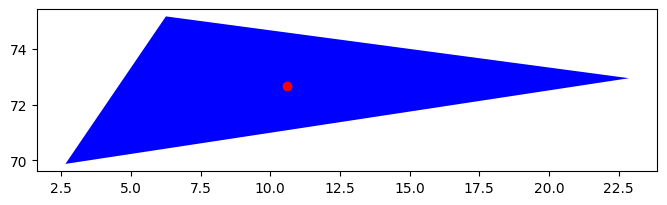

In [2]:
location_wgs84 = gp.json_to_geoseries(json_location)
centroid_wgs84 = location_wgs84.centroid

fig, ax = plt.subplots(figsize=(8, 8))
location_wgs84.plot(aspect = "equal", color = "blue", ax = ax)
centroid_wgs84.plot(aspect = "equal", color = "red", ax = ax)

In [3]:
proj_aeqd = gp.get_proj_aeqd(centroid_wgs84)
print(proj_aeqd)

+proj=aeqd +lat_0=72.65953333333334 +lon_0=10.5953 +y_0=0 +x_0=0 ++R=6371000 ++units=m +ellps=WGS84 +type=crs


/Users/arnald/Library/CloudStorage/OneDrive-UAB/wb/GeoPick/py/geopick.py:112: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_wgs84 = location_wgs84.centroid


Centroid: 0    POINT (11.54698 71.92976)
dtype: geometry
Uncertainty: 0    395927.827251
dtype: float64


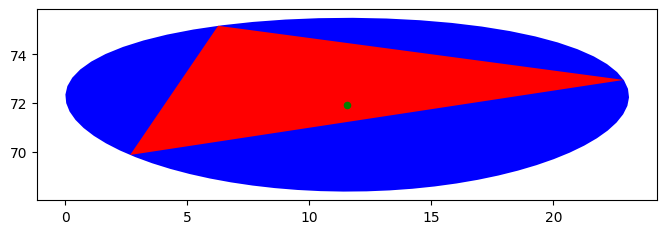

In [4]:
res = gp.get_georeference(location_wgs84)

centroid = res[0]
uncertainty = res[1]
sec = res[2]

fig, ax = plt.subplots(figsize=(8, 8))
sec.plot(aspect = "equal", color = "blue", ax = ax)
location_wgs84.plot(aspect = "equal", color = "red", ax = ax)
centroid.plot(aspect = "equal", color = "green", markersize = 20, ax = ax)

print("Centroid:", centroid)
print("Uncertainty:", uncertainty)

